In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(3, 'c')
c_qftadder = QuantumCircuit(q, c)

#Test
#c_qftadder.x(q[2])
#c_qftadder.x(q[1])
c_qftadder.x(q[0])


#QFT
c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

c_qftadder.h(q[5])
c_qftadder.cp(np.pi/4,q[3],q[5])
c_qftadder.cp(np.pi/2,q[4],q[5])
c_qftadder.h(q[4])
c_qftadder.cp(np.pi/2,q[3],q[4])
c_qftadder.h(q[3])
c_qftadder.swap(q[3], q[5])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

#CZ
c_qftadder.cp(np.pi, q[0], q[3])
c_qftadder.cp(np.pi / 2, q[1], q[3])
c_qftadder.cp(np.pi / 4, q[2], q[3])
c_qftadder.cp(np.pi, q[1], q[4])
c_qftadder.cp(np.pi / 2, q[2], q[4])
c_qftadder.cp(np.pi, q[2], q[5])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

#IQFT
c_qftadder.swap(q[3], q[5])
c_qftadder.h([3])
c_qftadder.cp(-np.pi/2, q[3], q[4])
c_qftadder.h(q[4])
c_qftadder.cp(-np.pi/2, q[4], q[5])
c_qftadder.cp(-np.pi/4, q[3], q[5])
c_qftadder.h(q[5])

#Measure
c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])
c_qftadder.measure(q[3], c[0])
c_qftadder.measure(q[4], c[1])
c_qftadder.measure(q[5], c[2])

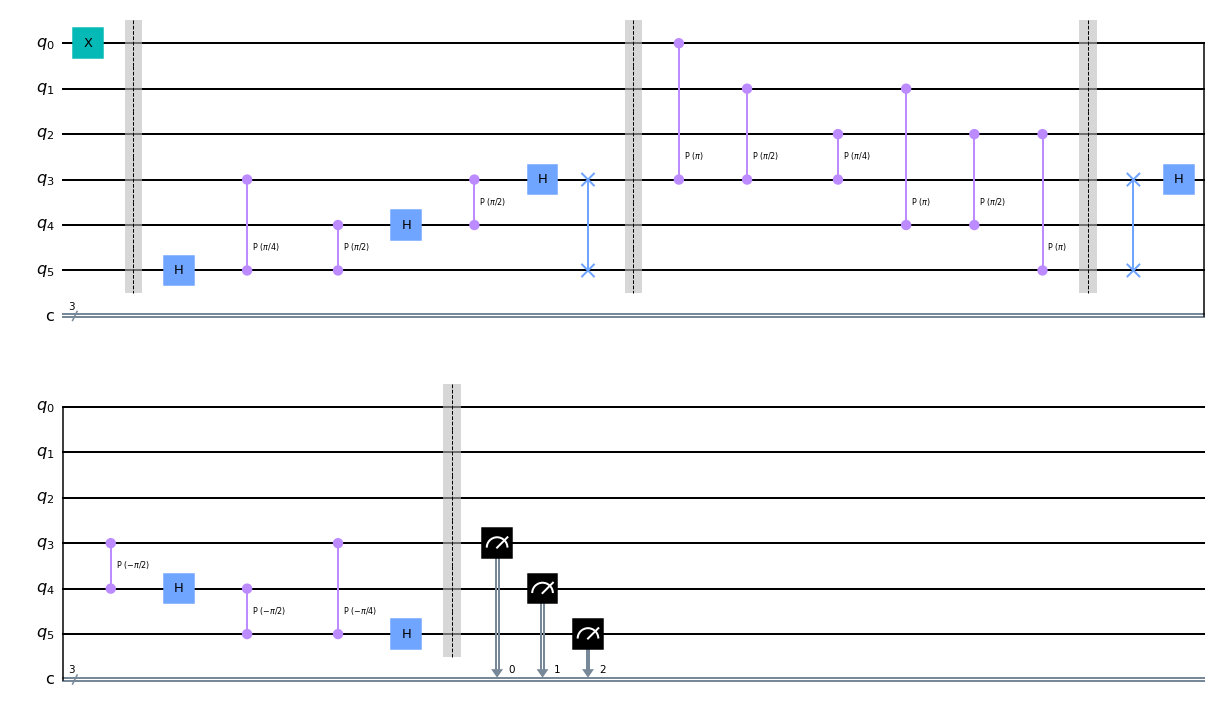

In [3]:
%matplotlib inline
c_qftadder.draw(output='mpl')

In [4]:
#provider = IBMQ.get_provider(hub='ibm-q-skku', group='korea-university', project='ku-graduate')
provider = IBMQ.get_provider(hub='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')
#backend = provider.get_backend('ibm_lagos')
backend = provider.get_backend('ibmq_qasm_simulator')
#simulator = Aer.get_backend('aer_simulator')

# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 6
#                                        and not x.configuration().simulator 
#                                        and x.status().operational==True))
# print("least busy backend: ", backend)

Traceback (most recent call last):
  Input In [4] in <cell line: 5>
    backend = provider.get_backend('ibm_qasm_simulator')
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/provider.py:55 in get_backend
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


In [ ]:
#job = execute(c_qftadder, backend, shots=2048)
job = execute(c_qftadder, backend)
result = job.result()
#result=simulator.run(c_qftadder).result()
counts = result.get_counts(c_qftadder)
#counts = result.get_counts(c_qftadder)

print("\nTotal count for 00 and 11 are:",counts)
#_qftadder.draw()
c_qftadder.draw()

In [ ]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

In [ ]:
new_circuit.count_ops()